In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
data=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0261-09.TEMP.nc')

lont = data.variables['TLONG']
latt = data.variables['TLAT']
######################121-09

In [3]:
lont = lont[190:490:10,1100:1300:10]
latt = latt[190:490:10,1100:1300:10]


In [4]:
#lont2 = lont[220:250:10,1300:1500:10]
#latt2 = latt[220:250:10,1300:1500:10]


In [5]:
data1 = np.loadtxt("rr.out")
result = np.zeros([12,20])
result = data1

In [6]:
data2 = np.loadtxt("rr2.out")
result2 = np.zeros([10,20])
result2 = data2

In [7]:
data3 = np.loadtxt("rr3.out")
result3 = np.zeros([10,20])
result3 = data3

In [8]:
data4 = np.loadtxt("rr4.out")
result4 = np.zeros([10,20])
result4 = data4

In [9]:
data5 = np.loadtxt("rr5.out")
result5 = np.zeros([3,20])
result5 = data5

In [10]:
data6 = np.loadtxt("rr6.out")
result6 = np.zeros([3,20])
result6 = data6

In [11]:
data01 = np.loadtxt("rr-1.out")
result01 = np.zeros([3,20])
result01 = data01

In [12]:
data7 = np.loadtxt("rr7.out")
result7 = np.zeros([3,20])
result7 = data7


In [13]:
data8 = np.loadtxt("rr8.out")
result8 = np.zeros([3,20])
result8 = data8

In [14]:
dataR = np.loadtxt("rrtry10.out")
resultR = np.zeros([3,20])
resultR = dataR

In [15]:
data02 = np.loadtxt("rr-2.out")
result02 = np.zeros([3,20])
result02 = data02

In [16]:
result[3:6,:] = result2[0:3,:]
result[6:9,:] = result3[0:3,:]
result[9:,:] = result4[0,:]

In [17]:
reu = np.vstack((result,result4[1:3,:]))

In [18]:
reu = np.vstack((reu,result5[:,:]))

In [19]:
reu = np.vstack((reu,result6[:,:]))

In [20]:
reu = np.vstack((reu,result7[:,:]))


In [21]:
reu = np.vstack((reu,result8[:,:]))

In [22]:
reu = np.vstack((result01[:,:],reu))

In [23]:
reu = np.vstack((result02[:,:],reu))

In [28]:
#np.savetxt('/scratch/user/xiliangdiao/plot/middle.out',reu)
reu.shape

(30, 20)

/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  del sys.path[0]
/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: The following kwargs were not used by contour: 'spacing'


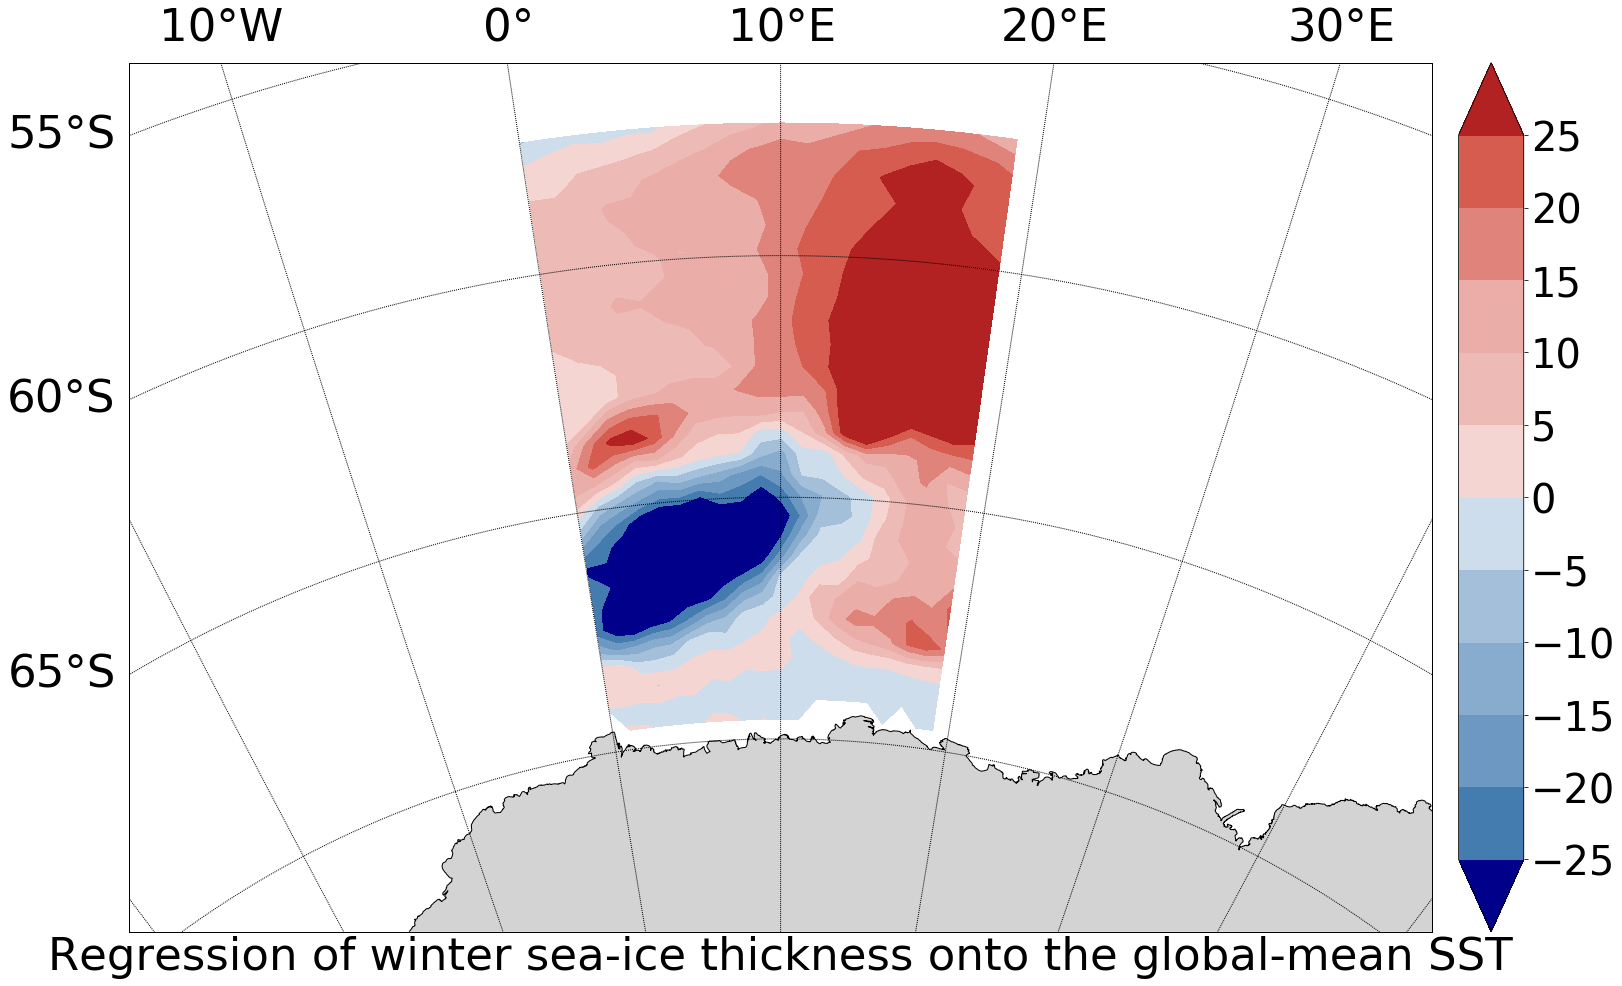

In [29]:
nice_cmap=sns.diverging_palette(245, 15, n=13,as_cmap=True)
#nice_cmap=sns.diverging_palette(245, 10, n=10,as_cmap=True)
lev_cmap = nice_cmap([1,30,50,70,100,150,170,180,210,230,240]) 
new_cmap = cols.ListedColormap(lev_cmap,"praj_cmap")
nice_levels = [-25,-20,-15,-10,-5,0,5,10,15,20,25]
norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)
#********************************************************************

plt.figure(figsize=(25,20))
my_font = {'fontname':'Cambria', 'size':'45'}
# set the mapping range
map = Basemap(projection='aeqd', lat_0 = -65, lon_0 = 10,area_thresh = 100,\
                     width = 3000000,height = 2000000,resolution ='h') 
#############################################
##width = 2500000,height = 1500000
##lat_0 = -65, lon_0 = 0
#############################################
map.drawcoastlines()
map.fillcontinents(color = 'lightgrey')
map.drawmapboundary(color='black')
 
map.drawparallels(np.arange(-90,91,5),labels=[1,0,0,0],**my_font)
map.drawmeridians(np.arange(-180,180,10),labels=[0,0,1,0],**my_font)

x,y=map(lont,latt)
#x2,y2=map(lont2,latt2)
CP = map.contourf(x,y,reu,levels = nice_levels,cmap = new_cmap,norm =norm,spacing = 'uniform',extend='both')
#CP = map.contourf(x2,y2,dataR[:3,:],levels = nice_levels,cmap = new_cmap,norm =norm,spacing = 'uniform',extend='both')
CP.cmap.set_over('firebrick')
CP.cmap.set_under('darkblue')

#CS=map.contour(x,y,plotvar,[700],colors = 'r', linestyles = 'solid',linewidths=1)
#plt.clabel(CS, inline=0.1, fontsize=30)
#cbar =map.colorbar(CP,extend='both',extendfrac='auto',extendrect='True')
cbar =map.colorbar(CP,extendfrac='auto',ticks= nice_levels)
#cbar.minorticks_on()
cbar.ax.tick_params(labelsize=40) 
#cbar.set_label('($^\circ$C)', **my_font)
plt.xlabel("Regression of winter sea-ice thickness onto the global-mean SST",**my_font)
plt.savefig("regression.png",bbox_inches='tight')

In [26]:
lont2.shape

NameError: name 'lont2' is not defined

In [ ]:
lont.shape